# Simple Shallow Water Equations Solver

## Theory

The three-dimensional Navier Stokes equations can be simplified to give the St Venant equations to express the conservation of mass and momentum along the flow direction and describe one dimensional fluid flow. They can be written in their general form as below: 
 
$$
\frac{\partial Q}{\partial x} + \frac{\partial A}{\partial t}=0
$$

$$
\frac{1}{A} \frac{\partial Q}{\partial t} + \frac{1}{A}\frac{\partial}{\partial x}(\frac{Q^2}{A}) + g \frac{\partial y}{\partial x} - g(S_o - S_f) = 0
$$

where $Q$ is the discharge, $A$ is the area of cross section, $y$ is the height of the water above a datum and $S_o$ and $S_f$ are the channel bottom slope and friction slope respectively.

It should be noted that the above form is non conservative but can be rearranged as below to to give their conservative form in order to preserve any shocks present. This formulation was proposed by Rogers and is based balancing of forces deviating away from the still water state by subtracting the static state conditions equations from the above. Providing the following formulation. 

\begin{equation}
X =  \Bigg[
\begin{matrix}{c}
h \\
Q
\end{matrix}
\Bigg]
\end{equation}
,
\begin{equation}
F =  \Bigg[
\begin{matrix}
Q \\
\dfrac{Q^2}{h+y} + \dfrac{gh^2}{2} + ghy
\end{matrix}
\Bigg]
\end{equation}
and
\begin{equation}
G =  \Bigg[
\begin{matrix}
0 \\
-gh\dfrac{\partial h}{\partial x} - \dfrac{gQ^2}{(h+y)^2 c^2}
\end{matrix}
\Bigg]
\end{equation}

## Numerical Method

The St Venant equations can be solved through the implementation of the finite difference MacCormack method with an additional term added to fulfil Total Variation Diminishing (TVD) requirements. The MacCormack-TVD method solves both of the equations  at each time step with regards to the time derivative to give a value for _h_ and _Q_ at the next time step. This method was first proposed by Davis and then applied to the Shallow Water Equations by Mingham and Liang . As was noted earlier this two step approach is chosen over a single step method, like the explicit Euler or Lax Wendroff schemes, as the source term can be easily treated to get second order accuracy in both space and time.

The McCormack two step procedure is defined as below.

\begin{equation}
U_j^p = U_{j^n} -  \lambda (F_{j+1}^n - F_j^n) - \Delta tV_j^n - \Delta tT_j^n- \Delta tS_j^n
\end{equation}

\begin{equation}
U_j^c = U_j^n -  \lambda (F_j^p - F_{j-1}^p) - \Delta tV_j^p - \Delta tT_j^n - \Delta tS_j^n
\end{equation} 

where the super indexes _p_ and _c_ stand for predictor and corrector steps, $ \lambda = \frac{ \Delta t}{ \Delta x}$. 

In the McCormack method the solution becomes the average of the predictor and corrector steps. 

\begin{equation}
U_j^{n+1} = \frac{1}{2} (U_j^p + U_j^c)
\end{equation} 

With the addition of the TVD term, as proposed by Mingham for the shallow water equations, this becomes. 

\begin{equation}
U_j^{n+1} = \frac{1}{2} (U_j^p + U_j^c) + (G(r_i^+) + G(r_{i+1}^-)) \Delta U_{i + \frac{1}{2}} - (G(r_{i+1}^+)+G(r_i^1)) \Delta U_{1- \frac{1}{2}}))
\end{equation}

in which the function $G( )$ is defined as. 

\begin{equation}
G(x) = 0.5C(1 - \phi (x)
\end{equation}

$ \phi (x) $ is the flux limited function and is given as

\begin{equation}
\phi (x) = max(0,min(2x,1))
\end{equation}

and the variable C is defined relative to the local Courant number by. 

\begin{equation*}
 C = \begin{cases}
       Cr(1-Cr),  & Cr \leq 0.5
       \\
       0.25 ,   & Cr > 0.5
       \end{cases}
\end{equation*}

and the local Courant number is defined as;

\begin{equation}
Cr = \frac{(|q_x/H| + \sqrt{gH} \Delta t}{ \Delta x}
\end{equation}

and, finally, in which. 

\begin{equation}
\Delta U_{i + \frac{1}{2}} = U_{i+1}^n - U_i^n
\end{equation}

\begin{equation}
\Delta U_{i - \frac{1}{2}} = U_i^n - U_{i-1}^n
\end{equation}

and the ratio of gradients is defined by. 

\begin{equation} 
r_i^+ = \frac{ \Delta h_{i - \frac{1}{2}}^n . \Delta h_{i + \frac{1}{2}}^n + \Delta q_{i - \frac{1}{2}}^n . \Delta q_{i + \frac{1}{2}}^n }{ \Delta h_{i + \frac{1}{2}}^n . \Delta h_{i + \frac{1}{2}}^n + \Delta q_{i + \frac{1}{2}}^n . \Delta q_{i + \frac{1}{2}}^n}
\end{equation}

\begin{equation}
r_i^- = \frac{ \Delta h_{i - \frac{1}{2}}^n . \Delta h_{i + \frac{1}{2}}^n + \Delta q_{i - \frac{1}{2}}^n . \Delta q_{i + \frac{1}{2}}^n }{ \Delta h_{i - \frac{1}{2}}^n . \Delta h_{i - \frac{1}{2}}^n + \Delta q_{i - \frac{1}{2}}^n . \Delta q_{i - \frac{1}{2}}^n}
\end{equation}

This algorithm is computationally efficient as there is no need to calculate the eigenvalues or eigenvectors and that the majority of the constituents of the TVD term have already been calculated. The scheme does not require transformation, so can be used without modification for non-linear problems. Importantly although a lot of studies implement the Lax-Wendroff method, which is a one step finite difference method, the MacCormack method has the advantage of being able to get a second-order accurate result when considering the source term.
 
 
# Implementation in Python
## Import Packages

The implementation of this algorithm involves the vector manipulation, to do that we need to use the Python library Numpy. To visualize the solutions we need to use pyplot.


In [87]:
import numpy
from matplotlib import pyplot

## Declaration of Fixed Variables and Definition of Grid

The one dimensional domain is a fixed length L and is split into a uniform grid defined by the distance between the points, dx. There are also fixed variables which determine the length of the simulatiom, TimeSim, the gravitational acceleration force, g, a marker which determines whether the TVD term is included, the ratio of dt/dx, k and a vector x which is used to plot the results later.   

In [88]:
dt =1.0
dx = 10.0
nx = 50
L = 500
g = 9.807
k= dt/dx
TimeSim = 10
TVDChoice = 1.0
t = 0
x = list(range(nx))

## Domain Descriptors and Initial Conditions

Next we need to define the case specific variables which describe the domain. This include the initial values for the discharge and height, the bathymetry through the channel, it also resets the values for the predictor and corrector dummy variables used in the two step maccormack method and calculates the water depth at each grid point. 

In [89]:
height = 0.5
Qin = 0.1
Hin = 0.5
z =numpy.zeros(nx)
h = numpy.ones(nx)*height
for i in range(25,nx):
    h[i]=0.2
q = numpy.ones(nx)*0.01
flux=numpy.zeros(nx)
hpredictor = h
hcorrector = h
qpredictor = q
qcorrector = q

TVDcont = numpy.zeros(nx)
TVDmom = numpy.zeros(nx)
cr = numpy.zeros(nx)
Grplus = numpy.zeros(nx)
Grminus = numpy.zeros(nx)
hnew = h
qnew = q
depth = h-z

If we plot the initial conditions we can see that this is being set up as a dam break - this isn't based on any analytical solutions. Just as a demo. If you want you can change it to any form you want! 

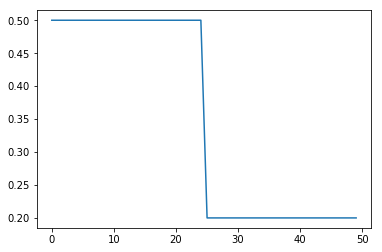

In [90]:
pyplot.clf()
pyplot.plot(x,h)
pyplot.show()

## Functions Used

Within the main time loop there are several functions

### def fluxcalc

In both the predictor and corrector steps a flux variable this function calculates the value of that for each of most up do date variable values

In [91]:
def fluxcalc (q, depth):
    for i in range(0,nx):
        flux[i] = q[i]**2/depth[i]
    return flux

### def predictor and def corrector def calc

This is just the implementation of the two step MacCormack method to determine the value of the water height and discharge

In [92]:
def predictor(h,q,flux,g,depth,k, z):
    for i in range(1,nx-1):
        hpredictor[i] = h[i] - k * (q[i+1] - q[i])
        qpredictor[i] = q[i]- k*(flux[i+1]-flux[i])-0.5*k*g*(depth[i]+depth[i+1])*(h[i+1]-h[i])
        depth[i] = hpredictor[i] - z[i]
    return hpredictor, qpredictor, depth

def corrector(h, q, flux, g, depth, hpredictor, qpredictor, k):
    for i in range(1,nx-1):
        hcorrector[i] = h[i] - k* (qpredictor[i] - qpredictor[i-1])
        qcorrector[i] = q[i] - k* (flux[i] - flux[i-1]) - 0.5*k*g * (depth[i]+depth[i-1]) * (h[i]-h[i-1])   
    return hcorrector, qcorrector

def calc(hcorrector, qcorrector, hpredictor, qpredictor):
    for i in range(1, nx-1):
        hnew[i] = 0.5*(hpredictor[i] + hcorrector[i])
        qnew[i] = 0.5*(qpredictor[i] + qcorrector[i])
        depth[i] = hnew[i] - z[i]
    return hnew, qnew

### def TVD

This is an optional modules which calculates the TVD term which is added to the updated water height and discharge terms

In [93]:
def TVD(h,q,depth,dt,dx):
    for i in range(1,nx-1):
        hminus = h[i] - h[i-1]
        hplus = h[i+1] - h[i]
        qminus = q[i] - q[i-1]
        qplus = q[i+1] - q[i]
        rplus = (hminus*hplus + qminus*qplus)/(hplus*hplus + qplus*qplus)
        rminus = (hminus*hplus + qminus*qplus)/(hminus*hminus +qminus*qminus)
        sigmaplus = max(0,min(2*rplus,1))
        sigmaminus = max(0,min(2*rminus,1))
        cr[i] = (abs(q[i]/depth[i]) + np.sqrt(g*depth[i]*dt/dx))
        if cr[1] <= 0.5:
            c = cr[i] * (1-cr[i])
        else:
            c = 0.25
        Grplus[i] = 0.5*c*(1-sigmaplus)
        Grminus[i] = 0.5*c*(1-sigmaminus)
    for i in range(1,nx-1):
        TVDcont[i] = (Grplus[i] + Grminus[i+1])*(h[i+1]-h[i]) - (Grplus[i-1]+Grminus[i])*(h[i]-h[i+1])
        TVDmom[i] = (Grplus[i] + Grminus[i+1])*(q[i+1]-q[i]) - (Grplus[i-1]+Grminus[i])*(q[i]-q[i+1])
    return TVDcont, TVDmom

### def bound and def resetvalues

These two functions reset the updated values to the current values of water height and discharge as well as determining the boundary conditions.

In [94]:
def resetvalues(hnew,qnew,h,q):
    h = hnew
    q = qnew
    depth = h - z
    return h, q, depth

def bound(q,h,depth,qpredictor,hpredictor):
    q[0]=Qin
    h[0]=Hin
    depth[0]=0.5
    qpredictor[0] = Qin
    hpredictor[0] = Hin
    q[nx-1]=Qin
    h[nx-1]=0.2
    depth[nx-1]=0.2
    qpredictor[nx-1] = Qin
    hpredictor[nx-1] = 0.2
    return q, h, depth, qpredictor, hpredictor

## Master function def MacCormack

This function calls the sub functions to implement the MacCormack method with an optional TVD step. Each function determines all the values for the domain at each step before moving onto the next. This is a result of using forward and backward differencing and ensures that all the calculations are performed at the same timestep. 

In [95]:
def MacCormack(h,q,depth,g,k,z):

    flux = fluxcalc(q, depth)
    hpredictor, qpredictor, depth = predictor(h, q, flux, g, depth, k, z)
    flux = fluxcalc(qpredictor, depth)
    hcorrector, qcorrector = corrector(h, q, flux, g, depth, hpredictor, qpredictor, k)
    hnew, qnew = calc(hcorrector, qcorrector, hpredictor, qpredictor)
    if TVDChoice == 1:
        TVDcont, TVDmom = TVD(hnew,qnew,depth,dt,dx)
        for i in range(1,nx-1):
            hnew[i] = hnew[i] + TVDcont[i]
            qnew[i] = qnew[i] + TVDmom[i]    
    return hnew, qnew, flux

## Time stepping loop

This calls def MacCormack and then time steps based on a fixed time step, this has to be chosen carefully as if it is too big it can cuase instabilities in the solution, too small and value of k can be too the solution getting stuck. 

In [96]:
nt = 0
while t < TimeSim:
    hcorrector, qcorrector, flux = MacCormack(h,q,depth,g,k,z)
    h,q,depth = resetvalues(hnew, qnew, h, q)
    t = t + dt
    nt = nt + 1
    q,h,depth,qpredictor, hpredictor = bound(q,h,depth, qpredictor, hpredictor)
    

C:\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
C:\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


## Plotting Results 

Final conditions are shown for water height and discharge

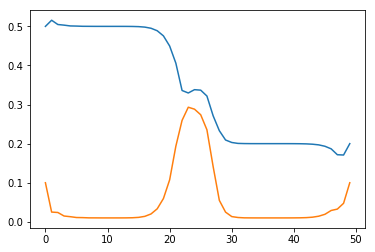

In [97]:
pyplot.clf()
pyplot.plot(x,h)
pyplot.plot(x,q)
pyplot.show()

## Without TVD term

The above example isn't good to remove the TVD term because it creates too much instability and the solution collpases so it it better to look at a uniform channel, in which instabilities can still be seen. First we have to reset some of the variables, redefine the channel and the boundary conditions function

In [108]:
dt =0.1
dx = 10.0
nx = 50
k= dt/dx
TimeSim = 30
TVDChoice = 0
t = 0

height = 0.5
Qin = 0.1
Hin = 0.5
z =numpy.zeros(nx)
h = numpy.ones(nx)*height
q = numpy.ones(nx)*0.01
flux=numpy.zeros(nx)
hpredictor = h
hcorrector = h
qpredictor = q
qcorrector = q

TVDcont = numpy.zeros(nx)
TVDmom = numpy.zeros(nx)
cr = numpy.zeros(nx)
Grplus = numpy.zeros(nx)
Grminus = numpy.zeros(nx)
hnew = h
qnew = q
depth = h-z

def bound(q,h,depth,qpredictor,hpredictor):
    q[0]=Qin
    h[0]=Hin
    depth[0]=0.5
    qpredictor[0] = Qin
    hpredictor[0] = Hin
    return q, h, depth, qpredictor, hpredictor

Lets have a look again at the initial conditions for this one. 

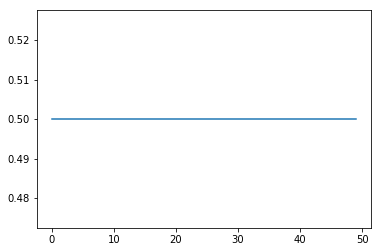

In [103]:
pyplot.clf()
pyplot.plot(x,h)
pyplot.show()

Now run the time stepping function without the TVD term and plot the results

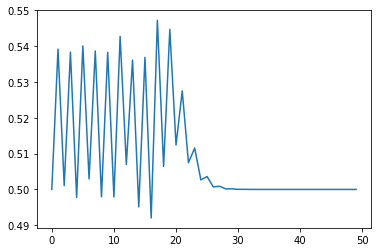

In [104]:
nt = 0
while t < TimeSim:
    hcorrector, qcorrector, flux = MacCormack(h,q,depth,g,k,z)
    h,q,depth = resetvalues(hnew, qnew, h, q)
    t = t + dt
    nt = nt + 1
    q,h,depth,qpredictor, hpredictor = bound(q,h,depth, qpredictor, hpredictor)

pyplot.plot(x,h)
pyplot.show()

You can see the instability moving down the channel now running the same simulation with the TVD step turned on

C:\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
C:\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


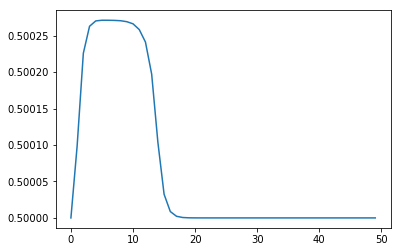

In [112]:
t = 0
TVDChoice = 1
Qin = 0.01

nt = 0
while t < TimeSim:
    hcorrector, qcorrector, flux = MacCormack(h,q,depth,g,k,z)
    h,q,depth = resetvalues(hnew, qnew, h, q)
    t = t + dt
    nt = nt + 1
    q,h,depth,qpredictor, hpredictor = bound(q,h,depth, qpredictor, hpredictor)
pyplot.clf()
pyplot.plot(x,h)
pyplot.show()

Instead now you can see that there is a smooth left travelling wave moving up the channel instead